<a href="https://colab.research.google.com/github/pranamyasin/projects/blob/main/CNN_cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os

In [ ]:
url='http://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir= tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=url,extract=True)

In [ ]:
os.path.dirname(zip_dir) 

'/root/.keras/datasets'

In [ ]:
cd/root/.keras/datasets

/root/.keras/datasets


In [ ]:
ls

cats_and_dogs_filtered/  cats_and_dogs_filtered.zip


In [ ]:
cd cats_and_dogs_filtered

/root/.keras/datasets/cats_and_dogs_filtered


In [ ]:
ls

train/  validation/  vectorize.py


In [ ]:
cd train

/root/.keras/datasets/cats_and_dogs_filtered/train


In [ ]:
ls

cats/  dogs/


In [ ]:
cd cats

/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [ ]:
ls

cat.0.jpg    cat.250.jpg  cat.400.jpg  cat.551.jpg  cat.701.jpg  cat.852.jpg
cat.100.jpg  cat.251.jpg  cat.401.jpg  cat.552.jpg  cat.702.jpg  cat.853.jpg
cat.101.jpg  cat.252.jpg  cat.402.jpg  cat.553.jpg  cat.703.jpg  cat.854.jpg
cat.102.jpg  cat.253.jpg  cat.403.jpg  cat.554.jpg  cat.704.jpg  cat.855.jpg
cat.103.jpg  cat.254.jpg  cat.404.jpg  cat.555.jpg  cat.705.jpg  cat.856.jpg
cat.104.jpg  cat.255.jpg  cat.405.jpg  cat.556.jpg  cat.706.jpg  cat.857.jpg
cat.105.jpg  cat.256.jpg  cat.406.jpg  cat.557.jpg  cat.707.jpg  cat.858.jpg
cat.106.jpg  cat.257.jpg  cat.407.jpg  cat.558.jpg  cat.708.jpg  cat.859.jpg
cat.107.jpg  cat.258.jpg  cat.408.jpg  cat.559.jpg  cat.709.jpg  cat.85.jpg
cat.108.jpg  cat.259.jpg  cat.409.jpg  cat.55.jpg   cat.70.jpg   cat.860.jpg
cat.109.jpg  cat.25.jpg   cat.40.jpg   cat.560.jpg  cat.710.jpg  cat.861.jpg
cat.10.jpg   cat.260.jpg  cat.410.jpg  cat.561.jpg  cat.711.jpg  cat.862.jpg
cat.110.jpg  cat.261.jpg  cat.411.jpg  cat.562.jpg  cat.712.jpg  cat.863.jpg


In [ ]:
zip_path=os.path.dirname(zip_dir)
dir_dataset='cats_and_dogs_filtered'
base_dir = os.path.join(zip_path, dir_dataset)
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'validation')

In [ ]:
print('path of base directory is-\n ' ,base_dir)
print('path of train directory is-\n',train_dir)
print('path of validation directory is-\n',val_dir)

path of base directory is-
  /root/.keras/datasets/cats_and_dogs_filtered
path of train directory is-
 /root/.keras/datasets/cats_and_dogs_filtered/train
path of validation directory is-
 /root/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
print(base_dir)

/root/.keras/datasets/cats_and_dogs_filtered


In [ ]:
train_cats=os.path.join(train_dir,'cats')
train_dogs=os.path.join(train_dir,'dogs')
val_cats=os.path.join(val_dir,'cats')
val_dogs=os.path.join(val_dir,'dogs')
print('path of train directory of cats is-\n',train_cats)
print('path of train directory of dogsis-\n',train_dogs)
print('path of validation directory of cats is-\n',val_cats)
print('path of validation directory of dogs is-\n',val_dogs)

path of train directory of cats is-
 /root/.keras/datasets/cats_and_dogs_filtered/train/cats
path of train directory of dogsis-
 /root/.keras/datasets/cats_and_dogs_filtered/train/dogs
path of validation directory of cats is-
 /root/.keras/datasets/cats_and_dogs_filtered/validation/cats
path of validation directory of dogs is-
 /root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [ ]:
num_cat_train =len(os.listdir(train_cats))
num_cat_train

1000

In [ ]:
num_dog_train =len(os.listdir(train_dogs))
num_dog_train

1000

In [ ]:
num_cat_val =len(os.listdir(val_cats))
num_cat_val

500

In [ ]:
num_dog_val =len(os.listdir(val_dogs))
num_dog_val

500

In [ ]:
total_cats= num_cat_train + num_cat_val    #similiarly dogs too are 1500
total_cats

1500

In [ ]:
total_train= num_cat_train + num_dog_train
total_train

2000

In [ ]:
total_val= num_cat_val + num_dog_val
total_val

1000

In [ ]:
import cv2
path= os.path.join(train_cats,'cat.0.jpg' )    #for every img the size different thus it is not unique
img= cv2.imread(path)
img.shape

(374, 500, 3)

In [ ]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [ ]:
train_data_generator= train_image_generator.flow_from_directory(directory=train_dir,
                                                                target_size=(150,150),
                                                                class_mode="binary")

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_generator= train_image_generator.flow_from_directory(directory=val_dir,
                                                                target_size=(150,150),
                                                                class_mode="binary")

Found 1000 images belonging to 2 classes.


In [ ]:
#BUILDING CNN MODEL

In [ ]:
cnn1 = tf.keras.Sequential()
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.Dropout(0.5))  
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(64,activation='relu'))
cnn1.add(tf.keras.layers.Dense(2,activation='softmax'))

In [ ]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 dropout_1 (Dropout)         (None, 34, 34, 32)       

In [ ]:
 cnn1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
early_stop= tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10)
batch_size=100       #initially was 32 since training data set is large we are redefining it
model_fit = cnn1.fit(train_data_generator,validation_data=val_data_generator,epochs=100,
                      steps_per_epoch=total_train/batch_size,validation_steps=total_val/batch_size,    #steps_perepoch=total_train/batch_sze=2000/100    #20 batch will be present for 1 epoch
                     callbacks=[early_stop])

Epoch 1/100
20/20 [==============================] - 3s 156ms/step - loss: 0.8760 - accuracy: 0.4968 - val_loss: 0.6926 - val_accuracy: 0.5094
Epoch 2/100
20/20 [==============================] - 3s 150ms/step - loss: 0.6975 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.4781
Epoch 3/100
20/20 [==============================] - 3s 143ms/step - loss: 0.6929 - accuracy: 0.5272 - val_loss: 0.6930 - val_accuracy: 0.5125
Epoch 4/100
20/20 [==============================] - 3s 142ms/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6929 - val_accuracy: 0.5156
Epoch 5/100
20/20 [==============================] - 3s 142ms/step - loss: 0.6933 - accuracy: 0.4936 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 6/100
20/20 [==============================] - 3s 142ms/step - loss: 0.6933 - accuracy: 0.4952 - val_loss: 0.6938 - val_accuracy: 0.4656
Epoch 7/100
20/20 [==============================] - 3s 144ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6930 - val_accuracy: 0.5469

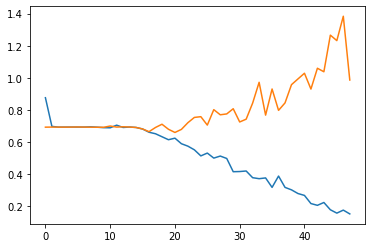

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])

In [ ]:
 #model is overfitting
